<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/comparison_between_ndvi_ndwi_evi_validating_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My Drive/research-the/

/content/drive/My Drive/research-the


In [ ]:
import pandas as pd

In [ ]:
ndvi_data = pd.read_csv('ndvi-2019-2022-gee.csv')
ndwi_data = pd.read_csv('ndwi-2019-2022-gee.csv')
evi_data = pd.read_csv('evi-2019-2022.csv')

for format datetime

In [ ]:
ndvi_data['system:time_start'] = pd.to_datetime(ndvi_data['system:time_start'])
ndwi_data['system:time_start'] = pd.to_datetime(ndwi_data['system:time_start'])
evi_data['system:time_start'] = pd.to_datetime(evi_data['system:time_start'])

#Analyzing their trends - variations over time

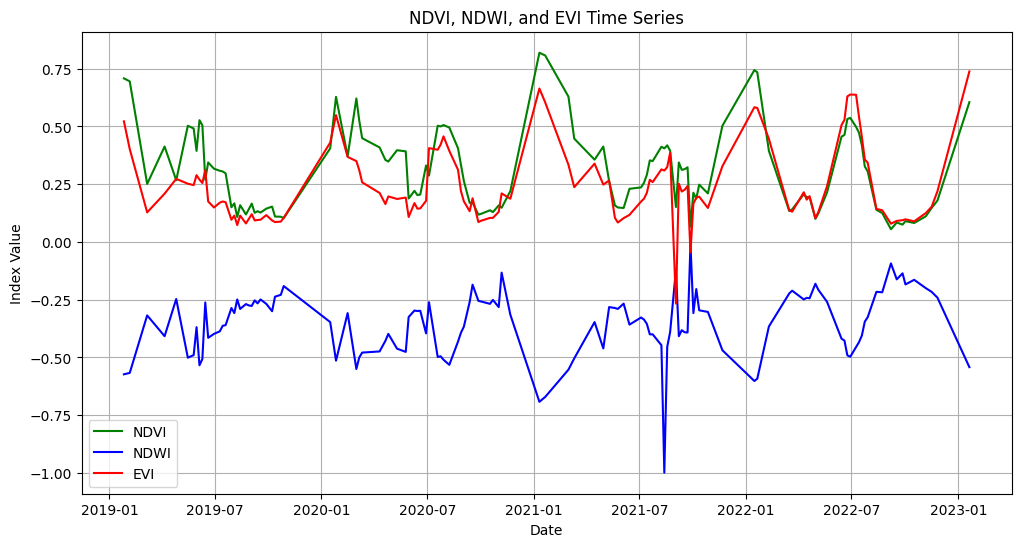

In [ ]:
import matplotlib.pyplot as plt

# Plot time-series data
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['system:time_start'], ndvi_data['ndvi'], label='NDVI', color='green')
plt.plot(ndwi_data['system:time_start'], ndwi_data['ndwi'], label='NDWI', color='blue')
plt.plot(evi_data['system:time_start'], evi_data['evi'], label='EVI', color='red')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('NDVI, NDWI, and EVI Time Series')
plt.legend()
plt.grid(True)
plt.show()

#Cross comparison

Scatterplots to visualize the relationships between NDVI, NDWI, and EVI.

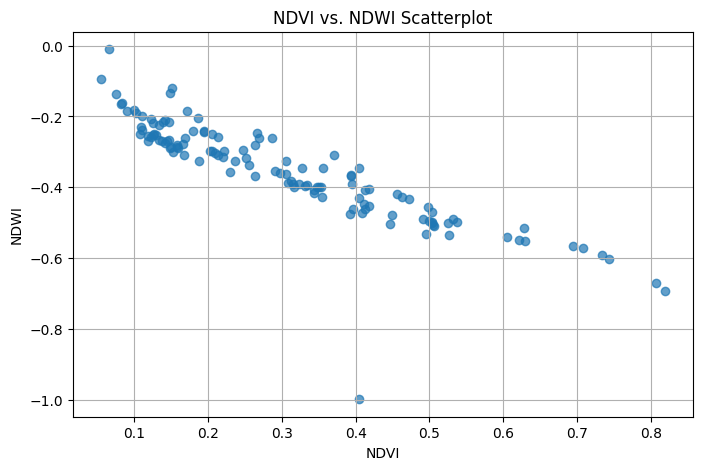

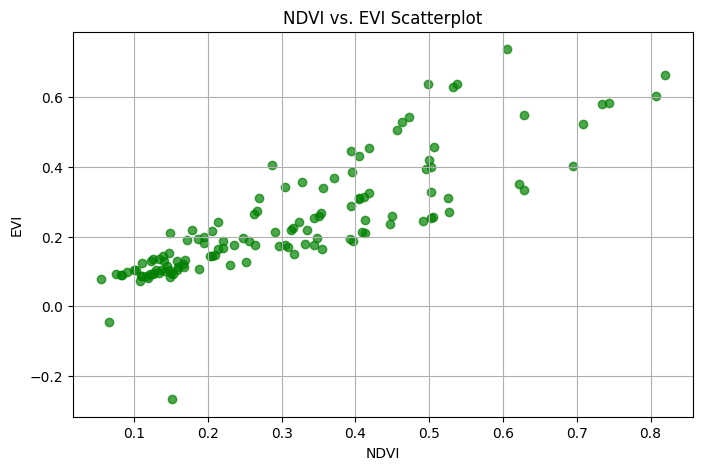

In [ ]:
# Scatterplot for NDVI vs. NDWI
plt.figure(figsize=(8, 5))
plt.scatter(ndvi_data['ndvi'], ndwi_data['ndwi'], alpha=0.7)
plt.xlabel('NDVI')
plt.ylabel('NDWI')
plt.title('NDVI vs. NDWI Scatterplot')
plt.grid(True)
plt.show()

# Scatterplot for NDVI vs. EVI
plt.figure(figsize=(8, 5))
plt.scatter(ndvi_data['ndvi'], evi_data['evi'], c='green', alpha=0.7)
plt.xlabel('NDVI')
plt.ylabel('EVI')
plt.title('NDVI vs. EVI Scatterplot')
plt.grid(True)
plt.show()


#Correlation Analysis

In [ ]:
correlation_ndvi_ndwi = ndvi_data['ndvi'].corr(ndwi_data['ndwi'])
correlation_ndvi_evi = ndvi_data['ndvi'].corr(evi_data['evi'])
print(f'Correlation between NDVI and NDWI: {correlation_ndvi_ndwi:.2f}')
print(f'Correlation between NDVI and EVI: {correlation_ndvi_evi:.2f}')

Correlation between NDVI and NDWI: -0.88
Correlation between NDVI and EVI: 0.84


#Time series descomposition

In [ ]:
# from statsmodels.tsa.seasonal import STL

# stl = STL(ndvi_data['ndvi'], seasonal=3)  # Adjust the seasonal period as needed
# result = stl.fit()
# seasonal = result.seasonal
# trend = result.trend
# residual = result.resid

# Plot the decomposed components
# plt.figure(figsize=(12, 6))
# plt.plot(ndvi_data['system:time_start'], trend, label='Trend', color='green')
# plt.plot(ndvi_data['system:time_start'], seasonal, label='Seasonal', color='blue')
# plt.plot(ndvi_data['system:time_start'], residual, label='Residual', color='red')
# plt.xlabel('Date')
# plt.ylabel('Component Value')
# plt.title('NDVI Time Series Decomposition')
# plt.legend()
# plt.grid(True)
# plt.show()

# https://stackoverflow.com/questions/68095810/statsmodels-tsa-stl-stl-unable-to-determine-period-from-endog


# Calculate seasonal means

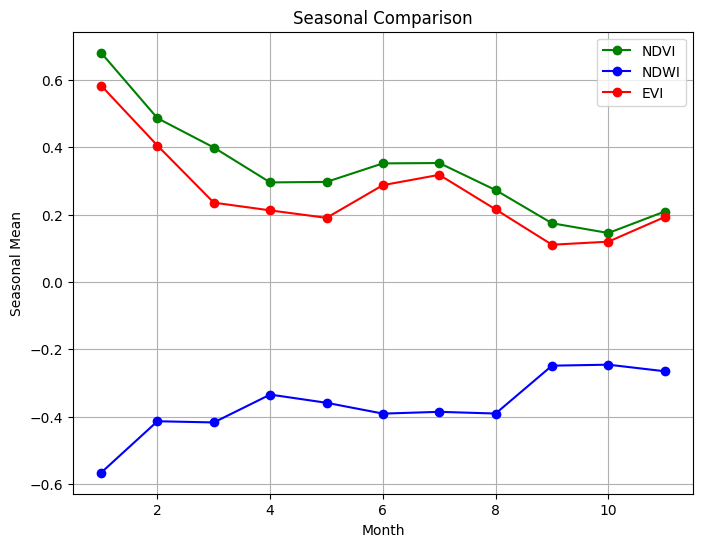

In [ ]:
# Calculate seasonal means
ndvi_seasonal_means = ndvi_data.groupby(ndvi_data['system:time_start'].dt.month)['ndvi'].mean()
ndwi_seasonal_means = ndwi_data.groupby(ndwi_data['system:time_start'].dt.month)['ndwi'].mean()
evi_seasonal_means = evi_data.groupby(evi_data['system:time_start'].dt.month)['evi'].mean()

# Plot seasonal means
plt.figure(figsize=(8, 6))
plt.plot(ndvi_seasonal_means.index, ndvi_seasonal_means, label='NDVI', marker='o', color='green')
plt.plot(ndwi_seasonal_means.index, ndwi_seasonal_means, label='NDWI', marker='o', color='blue')
plt.plot(evi_seasonal_means.index, evi_seasonal_means, label='EVI', marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Seasonal Mean')
plt.title('Seasonal Comparison')
plt.legend()
plt.grid(True)
plt.show()